In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
import plotly.graph_objects as go
%matplotlib inline

In [36]:
def log_Loss_Function(Absolute_Errors,sigma_values):
    return (1/2)*np.log(2*np.pi) + np.log(sigma_values) + (1/2) * (Absolute_Errors/sigma_values)**2

In [37]:
true_value = 10
std = 1
interval = 100
mean_values = np.linspace(-10000*true_value,100000*true_value,interval)
Absolute_Errors = true_value - mean_values
sigma_values = np.linspace(0.01*std,10*std,interval)
print(Absolute_Errors[:10],sigma_values[:10])

sigma_value = np.ones(shape = (interval,))
print(sigma_value[:10])

[1.00010000e+05 8.88988889e+04 7.77877778e+04 6.66766667e+04
 5.55655556e+04 4.44544444e+04 3.33433333e+04 2.22322222e+04
 1.11211111e+04 1.00000000e+01] [0.01       0.11090909 0.21181818 0.31272727 0.41363636 0.51454545
 0.61545455 0.71636364 0.81727273 0.91818182]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [38]:
log_Loss_Function(0.25,1)

0.9501885332046727

In [39]:
Flatten_condition = true_value + sigma_values*np.sqrt(sigma_values)

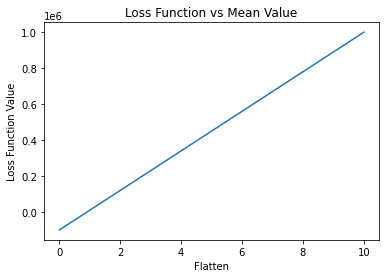

In [40]:
plt.Figure()
plt.plot(sigma_values,mean_values - Flatten_condition)
plt.xlabel("Flatten")
plt.ylabel("Loss Function Value")
plt.title("Loss Function vs Mean Value")
plt.show()

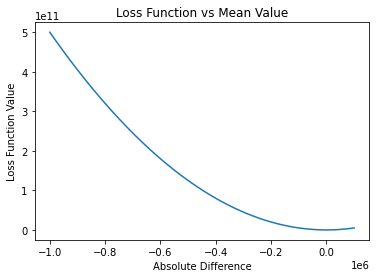

In [41]:
plt.Figure()
plt.plot(Absolute_Errors,log_Loss_Function(mean_values,sigma_value))
plt.xlabel("Absolute Difference")
plt.ylabel("Loss Function Value")
plt.title("Loss Function vs Mean Value")
plt.show()

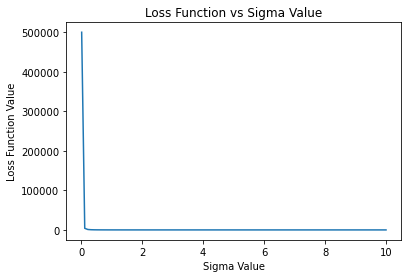

In [42]:
plt.Figure()
plt.plot(sigma_values,log_Loss_Function(true_value,sigma_values))
plt.xlabel("Sigma Value")
plt.ylabel("Loss Function Value")
plt.title("Loss Function vs Sigma Value")
plt.show()

In [43]:
x,y = np.meshgrid(Absolute_Errors,sigma_values)
z = log_Loss_Function(x,y)
print(np.shape(x),np.shape(y),np.shape(z))

(100, 100) (100, 100) (100, 100)


In [44]:
fig = go.Figure(data = [go.Surface(z = z, x = x, y = y)])
fig.update_layout(title = "LogNormal Loss Function", scene = dict(xaxis_title = "Absolute_Errors",yaxis_title = "Uncertainty", zaxis_title = "Loss"), autosize = False,
width = 500, height = 500)
fig.update_traces(contours_z = dict(show = True, usecolormap = True, highlightcolor = "limegreen", project_z = True))
fig.update_scenes(camera_eye_x = 1.5, camera_eye_y = -2.5, camera_eye_z = 0.5)

In [45]:
fig.write_image("LossSurfaceUpdated2.pdf")